> [AI/SW 융합학과] 문찬웅 1102481015

# CIFAR-10 CNN 훈련
## 라이브러리 import 및 CIFAR-10 데이터셋 가져오기
### 주요 기능
- CIFAR-10 데이터 세트는 60,000개의 이미지로 구성되어 있으며, 10개의 클래스로 나뉩니다.
- 각 클래스에는 교육용 이미지 5,000개와 테스트용 이미지 1,000개로 나뉜 6,000개의 이미지가 포함되어 있습니다.
이미지는 컬러이며 크기는 32x32픽셀입니다.
- 10가지 클래스는 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭을 상징합니다.

### 데이터 세트 구조
CIFAR-10 데이터 세트는 두 개의 하위 집합으로 나뉩니다:

- 훈련 세트: 이 하위 집합에는 머신러닝 모델 학습에 사용되는 50,000개의 이미지가 포함되어 있습니다.
- 테스트 세트: 이 하위 집합은 학습된 모델을 테스트하고 벤치마킹하는 데 사용되는 10,000개의 이미지로 구성됩니다.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# CIFAR-10 데이터셋 불러오기
(trainX, trainY), (testX, testY) = keras.datasets.cifar10.load_data()
trainX, testX = trainX / 255.0, testX / 255.0

# 32x32x3(RGB) 차원 적용
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 데이터 섞기
indices = np.arange(trainX.shape[0])
np.random.shuffle(indices)
trainX = trainX[indices]
trainY = trainY[indices]

indices = np.arange(testX.shape[0])
np.random.shuffle(indices)
testX = testX[indices]
testY = testY[indices]

## Case 1. 예제 13.2-1 의 CNN 모델

I0000 00:00:1731331683.302072  400316 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9536 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:09:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1731331685.602194  400446 service.cc:148] XLA service 0x7f33dc00f700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731331685.602251  400446 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-11-11 22:28:05.625270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731331685.736290  400446 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1731331687.638548  400446 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


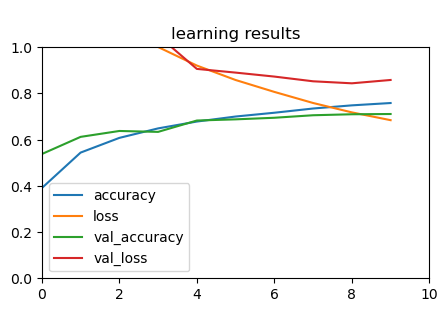

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7050 - loss: 0.8871


test_loss & test_acc: 0.8710 0.7075


In [2]:
# 예제 13.2-1 의 CNN 모델에서 Shape만 변경한 예시
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32 ,kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),

    Flatten(),

    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_split=0.25, verbose=0)

pd.DataFrame(history.history).plot.line(figsize=(5, 3))
plt.xlim(0, 10), plt.ylim(0, 1)
plt.title('\nlearning results')
plt.show()

test_loss, test_acc = model.evaluate(testX, testY)
print('\n\ntest_loss & test_acc:', '%5.4f' % test_loss, '%5.4f' % test_acc)


## 문찬웅(1102481015) CNN 모델

In [ ]:
def get_model():
    # 예제 13.2-1 의 CNN 모델에서 Shape만 변경한 예시
    return Sequential([
        Input(shape=(32, 32, 3)),
        
        # Convolution Layer에서 이미지의 특성을 추출
        Conv2D(1024 ,kernel_size=(3, 3), padding='same', activation='relu'),
        Conv2D(752 ,kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(365, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(512, kernel_size=(1, 1), padding='same', activation='relu'),
    
        Flatten(),

        # Dense Layer 에서 편향되지 않고 과대/과소적합되지 않도록 학습
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(752, activation='relu'),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(10, activation='softmax'),
    ])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = get_model()
model.summary()
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_split=0.25, verbose=1, callbacks=[callback], batch_size=64)

pd.DataFrame(history.history).plot.line(figsize=(5, 3))
plt.xlim(0, 10), plt.ylim(0, 1)
plt.title('\nlearning results')
plt.show()

test_loss, test_acc = model.evaluate(testX, testY)
print('\n\ntest_loss & test_acc:', '%5.4f' % test_loss, '%5.4f' % test_acc)

# model = get_model()
# nadam = keras.optimizers.Nadam(learning_rate=0.001)
# model.compile(optimizer=nadam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(trainX, trainY, epochs=10, validation_split=0.25, verbose=1, callbacks=[callback])

pd.DataFrame(history.history).plot.line(figsize=(5, 3))
plt.xlim(0, 10), plt.ylim(0, 1)
plt.title('\nlearning results')
plt.show()

test_loss, test_acc = model.evaluate(testX, testY)
print('\n\ntest_loss & test_acc:', '%5.4f' % test_loss, '%5.4f' % test_acc)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 1024)   │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 752)    │     6,931,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 752)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 512)    │     3,465,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 365)      │     1,682,285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 365)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 3, 3, 512)      │       187,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 752)            │       770,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 752)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       192,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,981,015 (68.59 MB)

 Trainable params: 17,981,015 (68.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 92/586 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.1019 - loss: 2.3219

## 데이터 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step

predictins for 20 data
 [0 8 8 6 2 6 1 2 7 6 0 1 0 7 6 7 5 0 5 7]


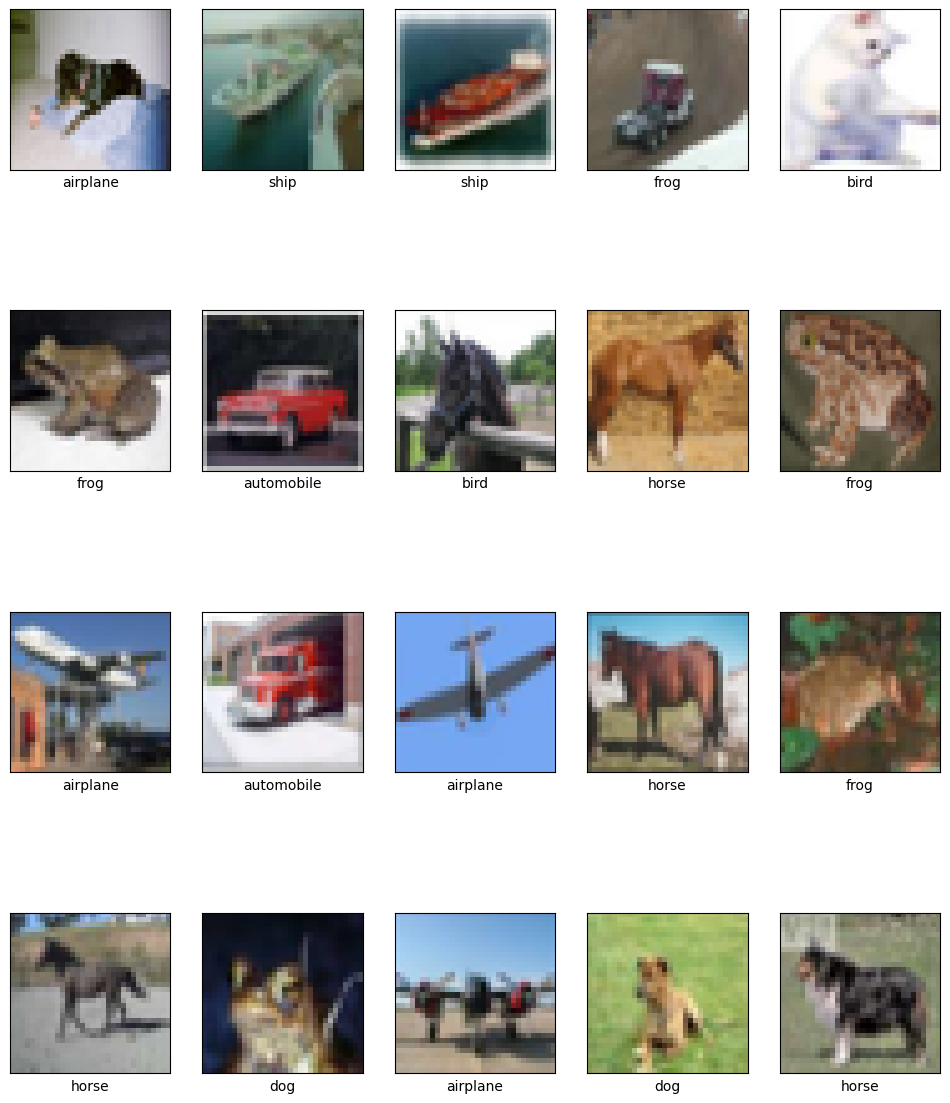

In [4]:
# 임의의 20개 테스트영상에 대한 예측 수행
randIdx = np.random.randint(1000, 1500)
images = testX[randIdx:randIdx + 20]

predictions = np.argmax(model.predict(images), axis=1)
print('\npredictins for 20 data\n', predictions)

plt.figure(figsize=(12, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[predictions[i]])
plt.show()